In [1]:
#import neccesary libraries
import pandas as pd #for data manipulation
import  numpy as np #numeric calculation
import matplotlib.pyplot as plt # for visualisation
plt.style.use('fivethirtyeight')
import seaborn as sns #data visualisation
import warnings
warnings.filterwarnings('ignore')
%autosave 1

Autosaving every 1 seconds


In [2]:
#import the dataset
df = pd.read_csv('youtubers_df.csv')

In [3]:
df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [4]:
df.tail()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
995,996,hamzymukbang,NaN,11700000.0,Estados Unidos,397400.0,14000.0,124.0,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,NaN,11700000.0,India,1100000.0,92500.0,164.0,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,NaN,11700000.0,India,14000.0,81.0,1.0,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...
999,1000,OneindiaHindi,Noticias y Política,11700000.0,India,2200.0,31.0,1.0,http://youtube.com/channel/UCOjgc1p2hJ4GZi6pQQ...


In [5]:
df.columns

Index(['Rank', 'Username', 'Categories', 'Suscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

In [6]:
df.shape

(1000, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


In [8]:
df.describe()

,Rank,Suscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,288.819436,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


In [9]:
#Check for duplicates
df.duplicated().sum()

0

In [10]:
#rename column
df.rename(columns ={'Suscribers':'Subscribers'}, inplace =True)

In [11]:
#unique values in each attribute
df.nunique()

Rank           1000
Username        994
Categories       45
Subscribers     274
Country          29
Visits          713
Likes           648
Comments        389
Links           994
dtype: int64

In [12]:
#check for missing values
df.isna().sum()

Rank             0
Username         0
Categories     306
Subscribers      0
Country          0
Visits           0
Likes            0
Comments         0
Links            0
dtype: int64

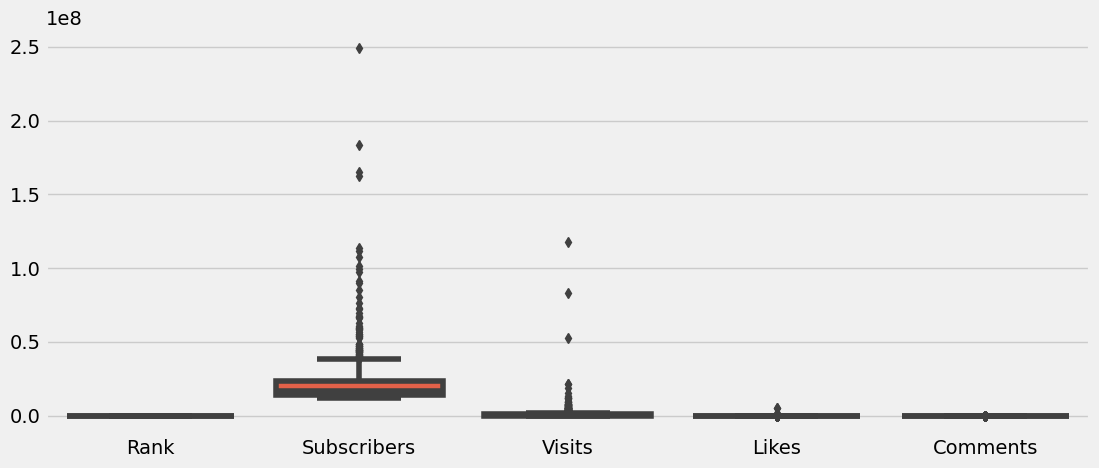

In [13]:
 #Checking for outliers
plt.figure(figsize=(12,5))
sns.boxplot(df)
plt.show()

<Axes: >

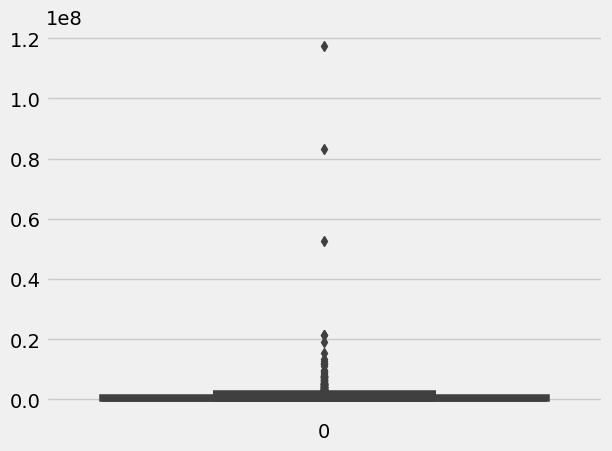

In [14]:
sns.boxplot(df['Visits'])

In [17]:
# Remove outliers using z-score method
from scipy import stats

In [26]:
# Detect outliers using z-score method
z_scores = np.abs(stats.zscore(df[['Subscribers', 'Visits', 'Likes', 'Comments']]))
threshold = 3
outliers_mask = (z_scores > threshold).any(axis=1)
df = df[~outliers_mask]

Text(0, 0.5, 'Count')

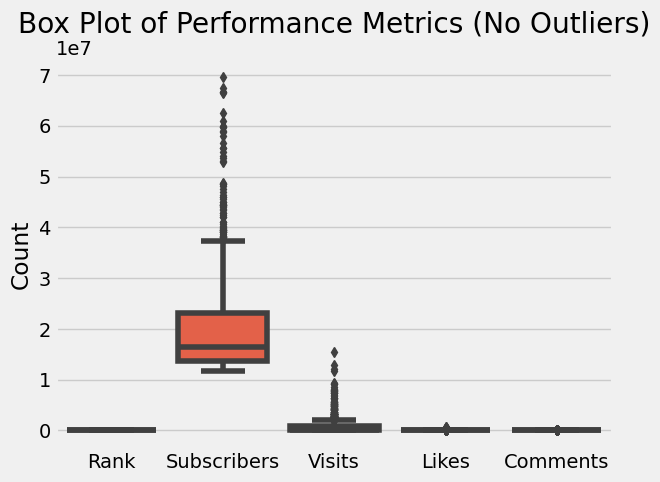

In [25]:
# Box plot after removing outliers
sns.boxplot(df_no_outliers)
plt.title("Box Plot of Performance Metrics (No Outliers)")
plt.ylabel("Count")

### Trend Analysis:

### Which categories are the most popular?

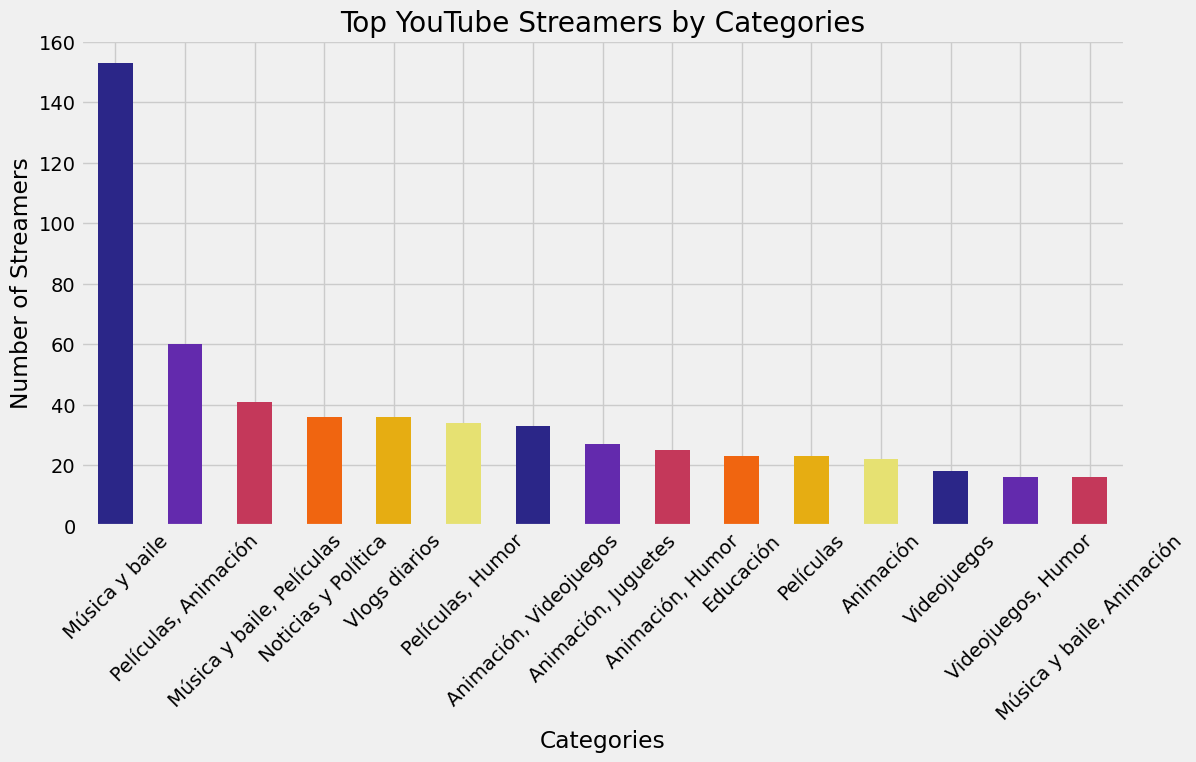

In [27]:
categories=df.groupby(['Categories']).size().sort_values(ascending =False)
categories.head(15).plot(kind = 'bar', color = sns.color_palette("CMRmap"), figsize=(12,6))
plt.title('Top YouTube Streamers by Categories')
plt.xlabel('Categories')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=45)
plt.show()

In [16]:
# most popular categories
category_counts=df['Categories'].value_counts().sort_values(ascending =False)
most_popular_category = category_counts.idxmax()
print("The most popular category among the top YouTube streamers is:", most_popular_category)


The most popular category among the top YouTube streamers is: Música y baile


### Is there a correlation between the number of subscribers and the number of likes or comments?

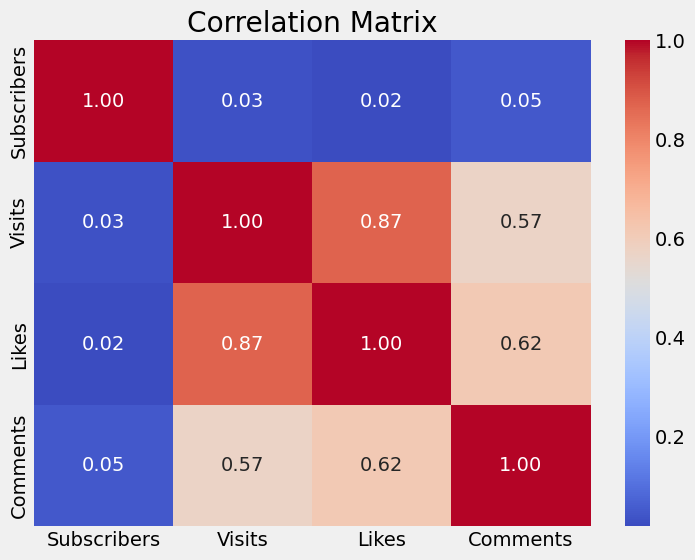

In [28]:
# Correlation between Subscribers, Likes, and Comments
correlation_matrix = df[['Subscribers','Visits', 'Likes', 'Comments']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#####  The highest positive correlation is between  number of visits and Likes
* The highest positive correlation (0.85) is observed between the number of visits and likes. 
* This correlation indicates that as the number of visits to a channel increases, there tends to be a corresponding increase in the number of likes.
* This relationship is intuitive, as higher visitation suggests a higher level of user engagement and appreciation for the channel's content.

##### There is positive correlation between number of  subscribers and Likes (0.21) , Visits(0.25)
* A positive correlation is also noted between the number of subscribers and likes (0.21), as well as between the number of subscribers and visits (0.25). 
* This suggests that channels with a larger subscriber base tend to receive more likes and visits. However, it's important to note that the correlation coefficient values (0.21 and 0.25) indicate a weaker correlation compared to the correlation between visits and likes (0.85). 
* This implies that while there is a relationship between the number of subscribers and engagement metrics (likes and visits), it may not be as strong as the relationship between visits and likes

## Audience Study

### Objective
* Analyze the distribution of streamers audiences by country.
* Are there regional preferences for specific content categories?

In [29]:
 #Get the top 10 categories with the highest number of streamers
top_categories = df['Categories'].value_counts().nlargest(10).index

#Filter the dataset to include only the top 10 categories
df_top_categories = df[df['Categories'].isin(top_categories)]

#Group data by country and content category, then calculate the count
country_category_counts = df_top_categories.groupby(['Country', 'Categories']).size().nlargest(10).reset_index(name='Streamers Count').sort_values(by ='Streamers Count',ascending = False)

In [30]:
#Calculate the average number of streamers for the "Musica Bale" category
musica_bale_average = country_category_counts[country_category_counts['Categories'] == 'Música y baile']['Streamers Count'].mean()

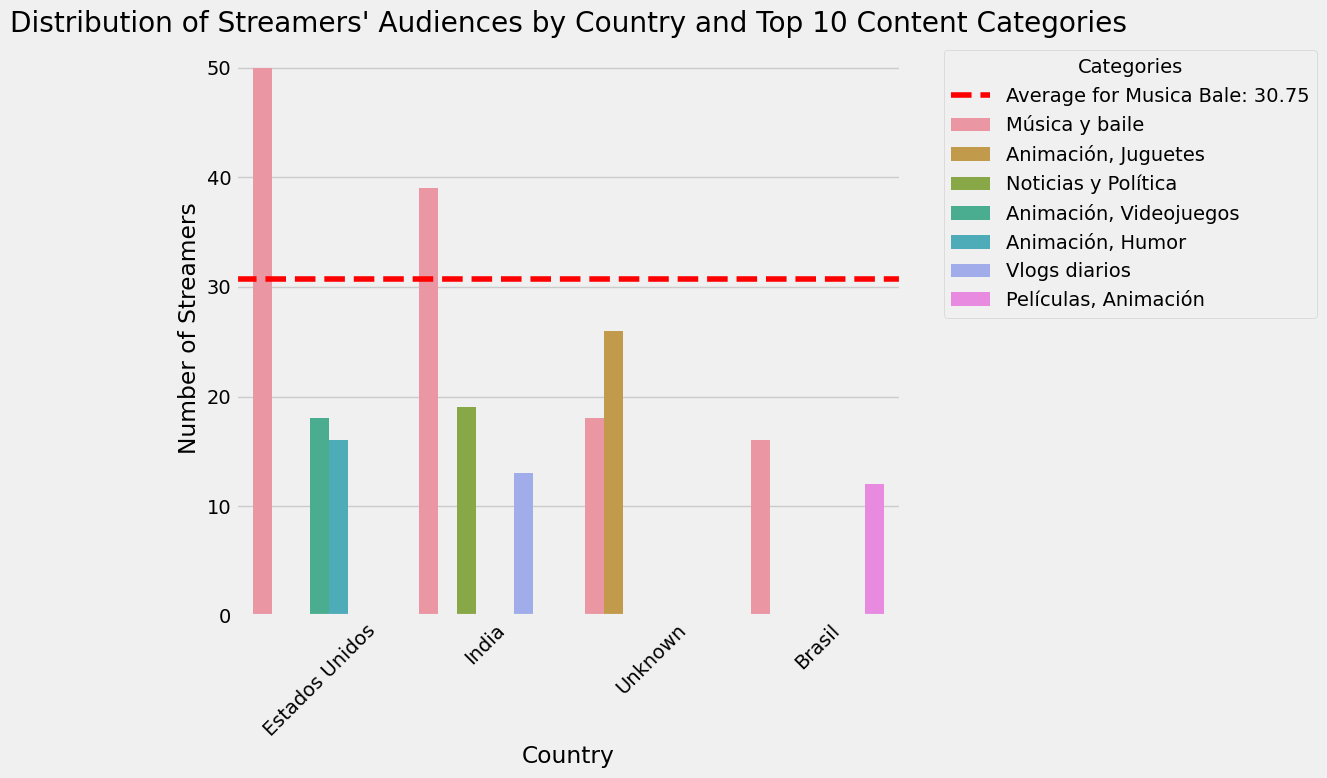

In [31]:
# Visualize the distribution of streamers' audiences by country and content category
plt.figure(figsize=(12, 8))
sns.barplot(x='Country', y='Streamers Count', hue='Categories', data=country_category_counts)
plt.axhline(y=musica_bale_average, color='red', linestyle='--', label=f'Average for Musica Bale: {musica_bale_average:.2f}')
plt.title('Distribution of Streamers\' Audiences by Country and Top 10 Content Categories')
plt.xlabel('Country')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=45)
plt.legend(title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Insights
###### Top 4 Countries with Highest Streamers Audience
* The top 4 countries with highest streamers audience are Estados Unidos, India, Brasil and Unkown 
###### Most Preferred Category in Top 4 Countries:
* 'Música y baile' is the category that is the most preffered category in the top 4 countries with an average of 32.5 streamers in each country.

#### Performance Metrics:
- Calculate and visualize the average number of subscribers, visits, likes, and comments.
- Are there patterns or anomalies in these metrics?

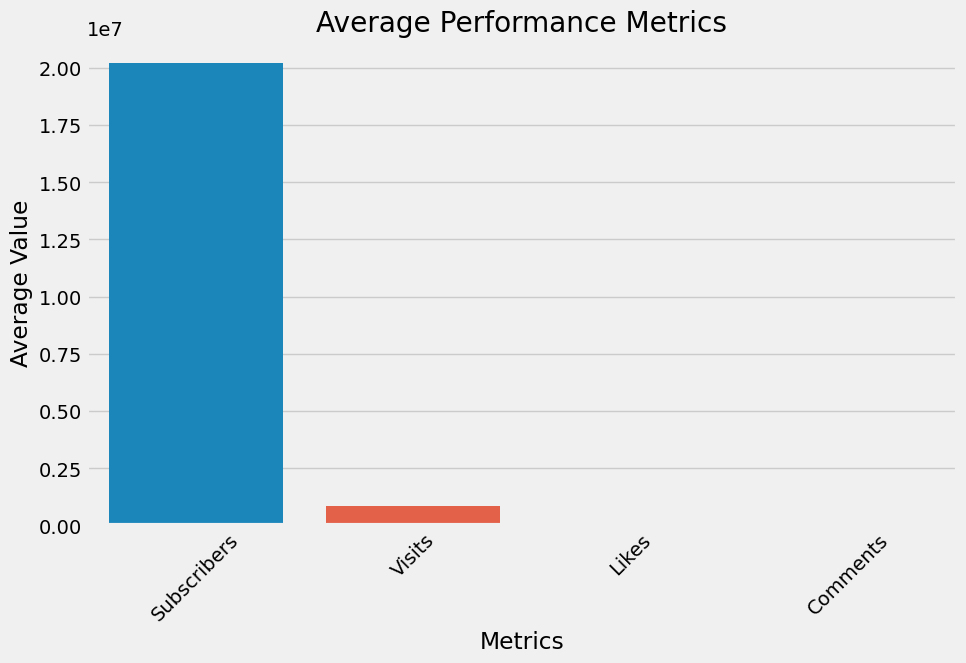

In [32]:
# Step 2: Calculate the average number of subscribers, visits, likes, and comments
average_metrics = df[['Subscribers', 'Visits', 'Likes', 'Comments']].mean()

# Step 3: Visualize the averages
plt.figure(figsize=(10, 6))
sns.barplot(x=average_metrics.index, y=average_metrics.values)
plt.title('Average Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.show()

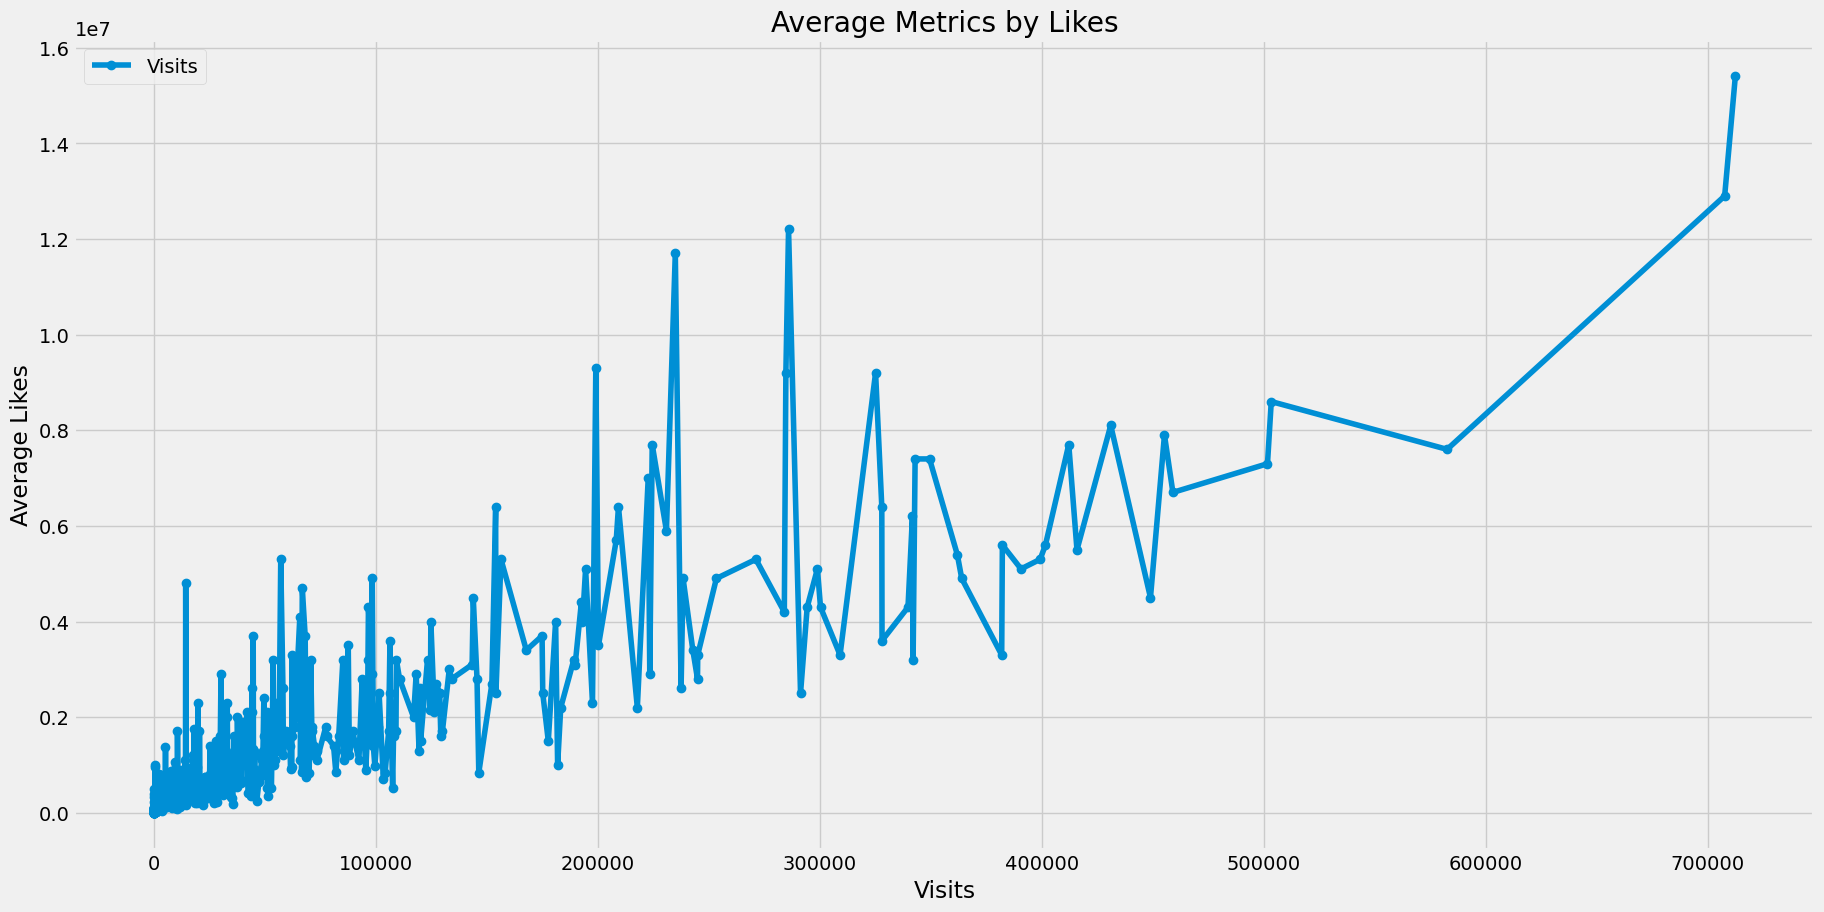

In [57]:
#Calculate the average number of subscribers, visits, likes, and comments
average_metrics = df[[ 'Subscribers', 'Visits', 'Likes', 'Comments']].groupby('Likes').mean()
plt.figure(figsize=(20, 10))
#Plot average visits
plt.plot(average_metrics.index, average_metrics['Visits'], marker='o', label='Visits')

plt.title('Average Metrics by Likes')
plt.xlabel('Visits')
plt.ylabel('Average Likes')
plt.legend()
plt.grid(True)
plt.show()


###### Insights:
- The average number of likes tends to increase as the number of visits to a channel increases.
- However, there are fluctuations observed, particularly between 20,000 and 40,000 visits, indicating variations in user engagement during this range of visit counts.

#### Content Categories:
##### Objectives
- Explore the distribution of content categories. Which categories have the highest number of streamers?
- Are there specific categories with exceptional performance metrics?

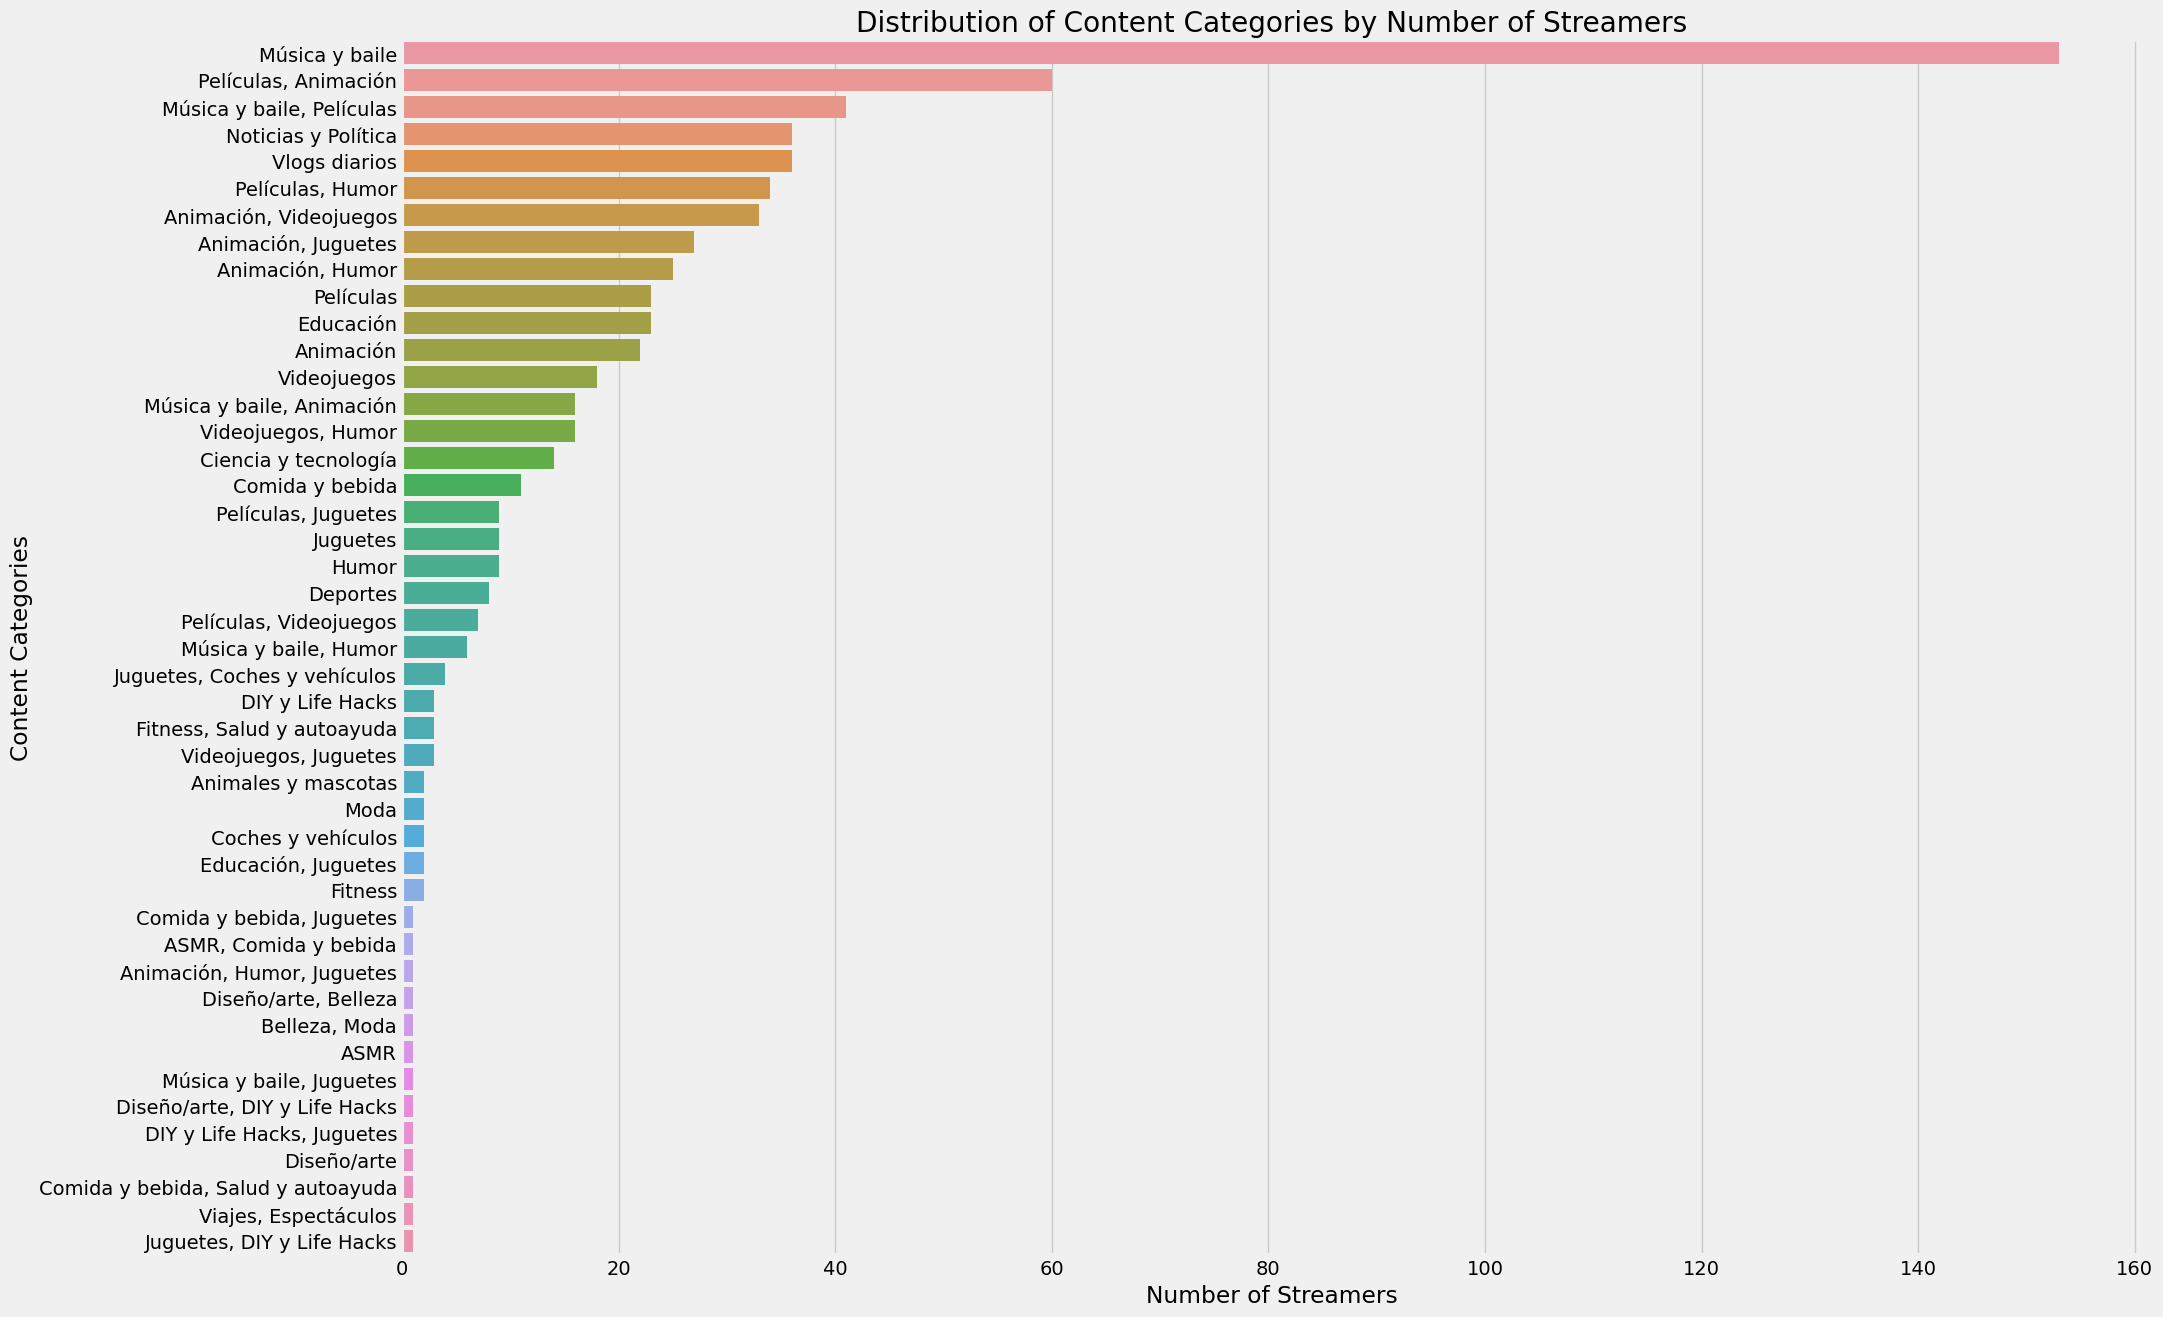

In [36]:
#Explore the distribution of content categories
plt.figure(figsize=(20, 15))
sns.countplot(y='Categories', data=df, order=df['Categories'].value_counts().index)
plt.title('Distribution of Content Categories by Number of Streamers')
plt.xlabel('Number of Streamers')
plt.ylabel('Content Categories')
plt.show()

In [37]:
#Analyze performance metrics for each content category
performance_metrics = ['Subscribers', 'Visits', 'Likes', 'Comments']
category_performance = df.groupby('Categories')[performance_metrics].mean()

In [38]:
#Identify categories with exceptional performance
exceptional_categories = category_performance.idxmax()
print("\nCategories with Exceptional Performance Metrics:")
print(exceptional_categories)


Categories with Exceptional Performance Metrics:
Subscribers                Juguetes
Visits           Videojuegos, Humor
Likes          Diseño/arte, Belleza
Comments         Videojuegos, Humor
dtype: object


#####   Insghts
* 'Música y baile' stands out as the category with the highest number of streamers.
* Visits and Likes: 
   * The categories $Diseño/arte$ and $Belleza $ exhibit exceptional performance in terms of the number of visits and likes.
* Subscribers: 
   * $Juguetes$ performs exceptionally well in terms of attracting subscribers.
* Comments:
  * The categories $Animación $ and $Videojuegos$ stand out for generating a high number of comments.

##### Brands and Collaborations:
###### Objective
- Analyze whether streamers with high performance metrics receive more brand collaborations and marketing campaigns.


In [39]:
#performance metrics
performance_metrics = ['Subscribers', 'Visits', 'Likes', 'Comments']

# Identify potential indicators of brand collaborations 
#Consider videos with unusually high likes or Visits as potential indicators, since they are highly corelated
potential_indicator = (df['Likes'] > df['Likes'].mean()) | (df['Visits'] > df['Visits'].mean())

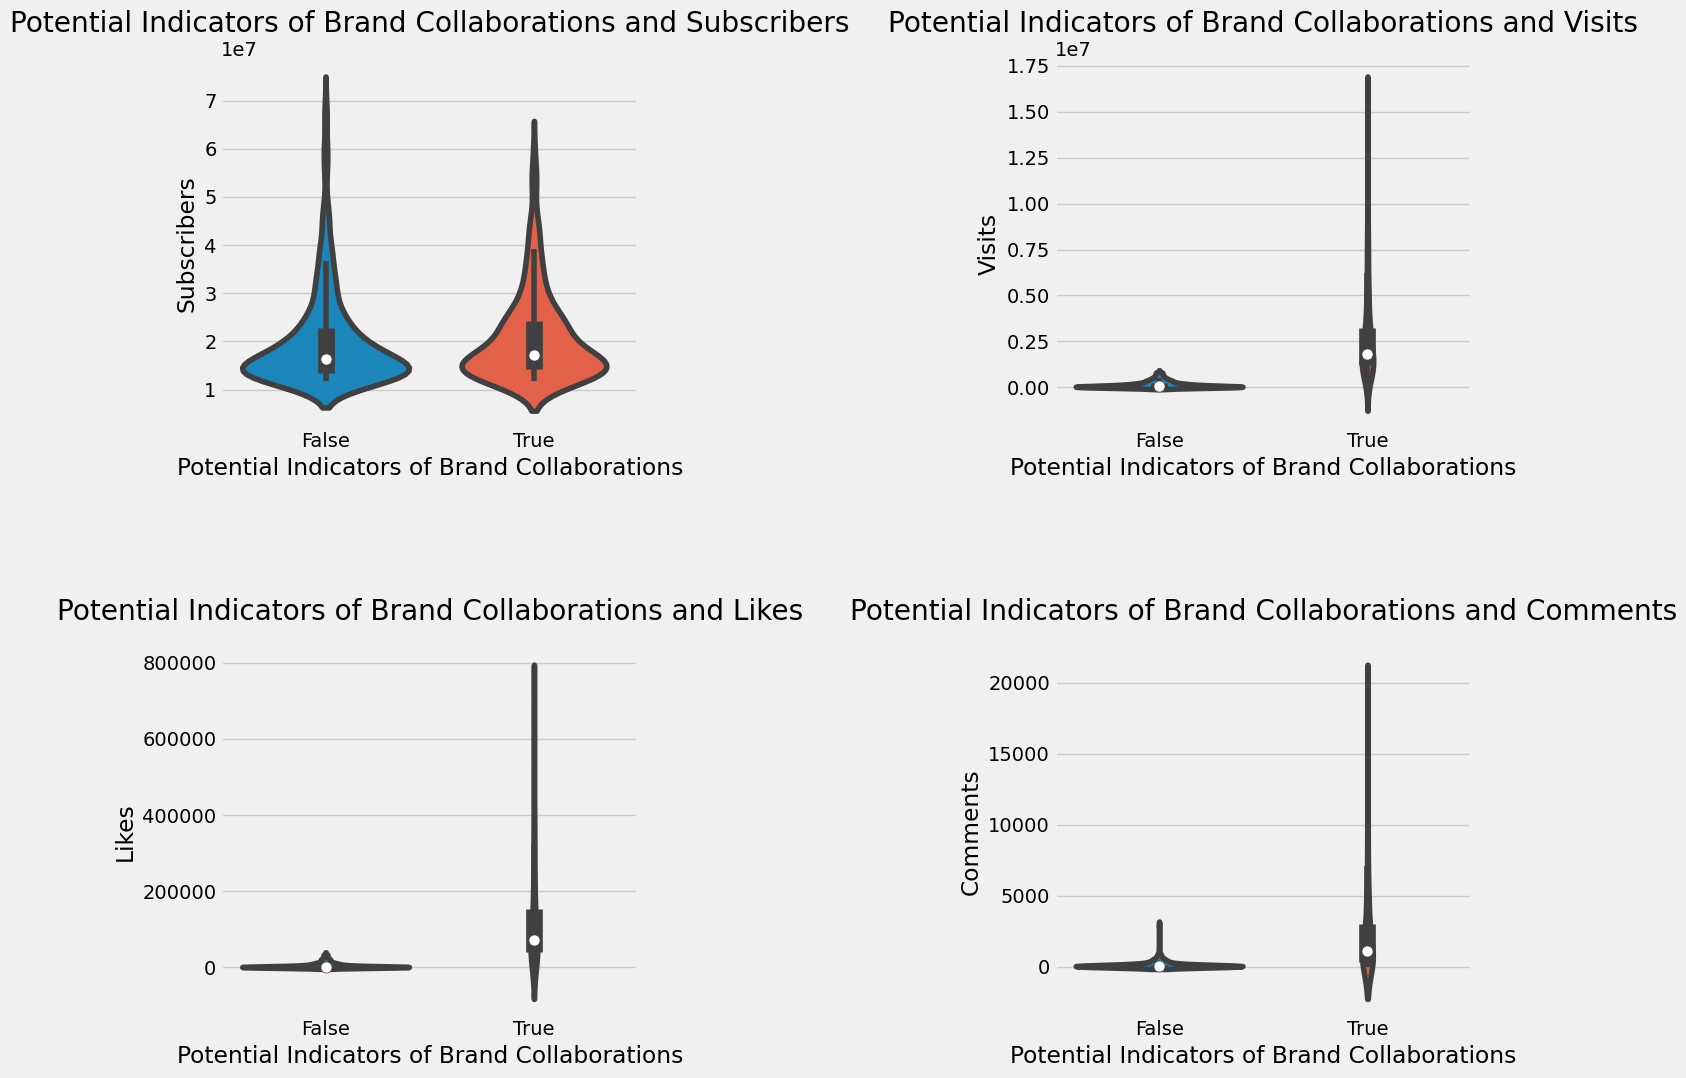

In [40]:
# Step 4: Analyze the relationship between performance metrics and potential indicators of brand collaborations
plt.figure(figsize=(14, 11))
for index, metric in enumerate(performance_metrics, start=1):
    plt.subplot(2, 2, index)
    sns.violinplot(x=potential_indicator, y=df[metric])
    plt.title(f'Potential Indicators of Brand Collaborations and {metric}', pad = 20)
    plt.xlabel('Potential Indicators of Brand Collaborations')
    plt.ylabel(metric)
plt.tight_layout()
# Add more spacing between subplots
plt.subplots_adjust(wspace=1.0, hspace=0.6)
plt.show()

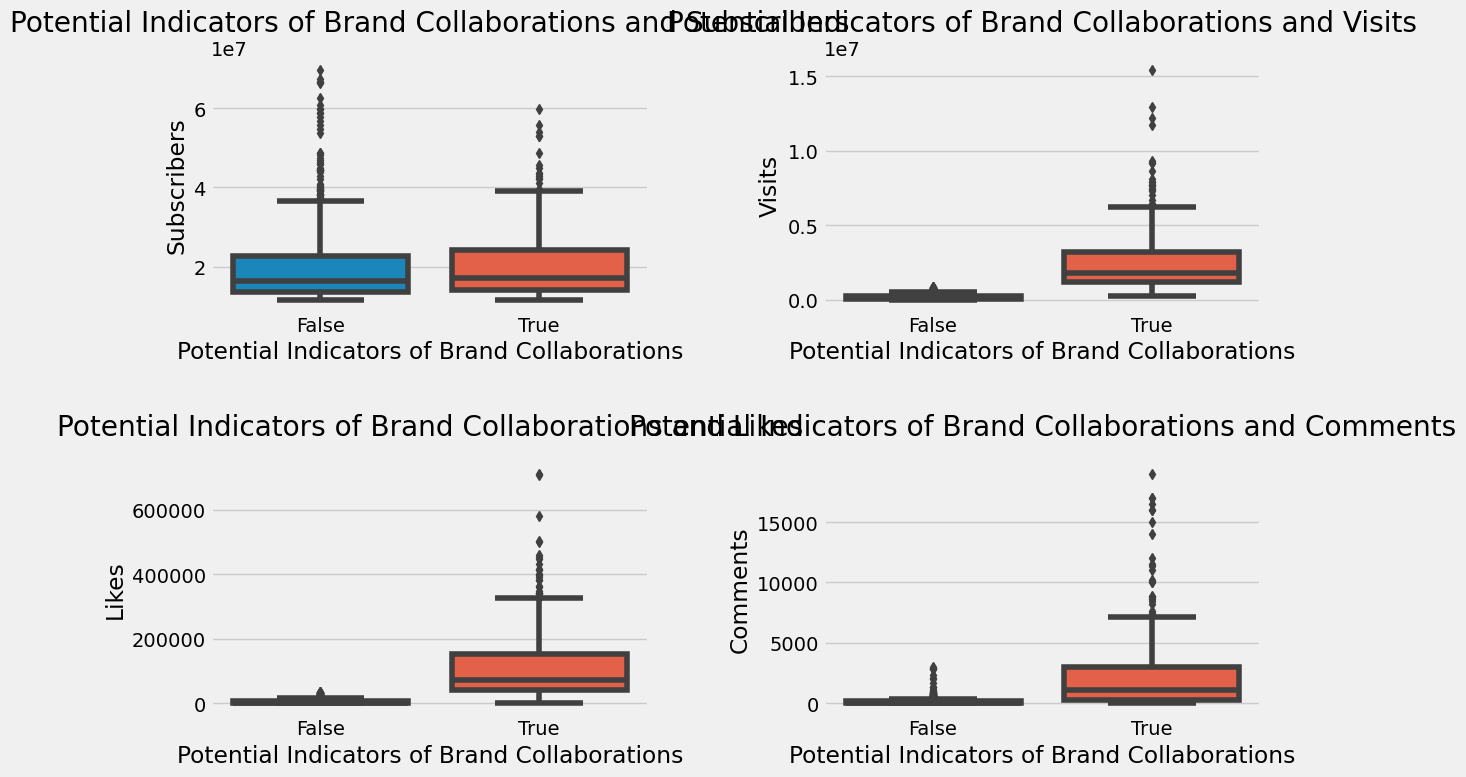

In [41]:
plt.figure(figsize=(12, 8))
for index, metric in enumerate(performance_metrics, start=1):
    plt.subplot(2, 2, index)
    sns.boxplot(x=potential_indicator, y=df[metric])
    plt.title(f'Potential Indicators of Brand Collaborations and {metric}', pad = 20)
    plt.xlabel('Potential Indicators of Brand Collaborations')
    plt.ylabel(metric)
plt.tight_layout()
# Add more spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.show()

##### Benchmarking
- Identify streamers with above-average performance in terms of subscribers, visits, likes, and comments.
- Who are the top-performing content creators?


In [42]:
#Average performance metrics
average_metrics = df[['Subscribers', 'Visits', 'Likes', 'Comments']].mean()

In [43]:
average_metrics

Subscribers    2.022925e+07
Visits         8.387312e+05
Likes          3.625669e+04
Comments       7.676962e+02
dtype: float64

In [44]:
#Filter streamers with above-average performance metrics
above_average_streamers = df[
    (df['Subscribers'] > average_metrics['Subscribers']) &
    (df['Visits'] > average_metrics['Visits']) &
    (df['Likes'] > average_metrics['Likes']) &
    (df['Comments'] > average_metrics['Comments'])
]

In [45]:
#Top-performing content creators
top_performing_creators = above_average_streamers.sort_values(by=['Subscribers', 'Visits', 'Likes', 'Comments'], ascending=False)

In [64]:
# Display the top-performing content creators
print("Top-Performing Content Creators:")
print(top_performing_creators[['Username', 'Subscribers', 'Visits', 'Likes', 'Comments']])

Top-Performing Content Creators:
                     Username  Subscribers      Visits     Likes  Comments
26                dudeperfect   59700000.0   5300000.0  156500.0    4200.0
34                TaylorSwift   54100000.0   4300000.0  300400.0   15000.0
37               ArianaGrande   52900000.0   1100000.0   85800.0    3800.0
39                JuegaGerman   48600000.0   2000000.0  117100.0    3000.0
48                 felipeneto   45600000.0    850600.0   82100.0    1100.0
58                  Mikecrack   43400000.0   2200000.0  183400.0    1800.0
62             KimberlyLoaiza   42100000.0   5300000.0  271300.0   16000.0
64            luisitocomunica   41100000.0   2500000.0  128900.0    1800.0
70                JessNoLimit   39600000.0   1300000.0   73500.0    1600.0
96             TotalGaming093   36300000.0   1500000.0  129400.0    4900.0
98       TechnoGamerzOfficial   35600000.0   6200000.0  341800.0   16500.0
100                markiplier   35500000.0   2100000.0  126500.0   

#### Recomendations

-   Investigating factors contributing to fluctuations within specific visit count ranges could provide valuable insights for optimizing content strategy and enhancing user engagement.

****  Content-based filtering: Recommend similar content to users based on their watch history and previously watched channels within their preferred categories. ***
- 3 ***Collaborative filtering: Recommend content based on what other users with similar preferences have watched within the same category.